<a href="https://colab.research.google.com/github/yhamidah/AI-Assignments/blob/main/Housing_Information_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

[Problem 1] Obtaining a dataset

In [3]:
df = pd.read_csv("train.csv")

###[Problem 2] Investigating the dataset itself



######The dataset information gave explanatory varaibles decribing the prices of 79 different types of housing  in Ames and Iowa.
The data wa gathered between 2006 and 2010 and wa published in 2011.

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset.

###Data Overview

[Problem 3] Checking the data

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df["SalePrice"].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df["Neighborhood"].head()

0    CollgCr
1    Veenker
2    CollgCr
3    Crawfor
4    NoRidge
Name: Neighborhood, dtype: object

[Problem 4] Dealing with missing values

<Axes: >

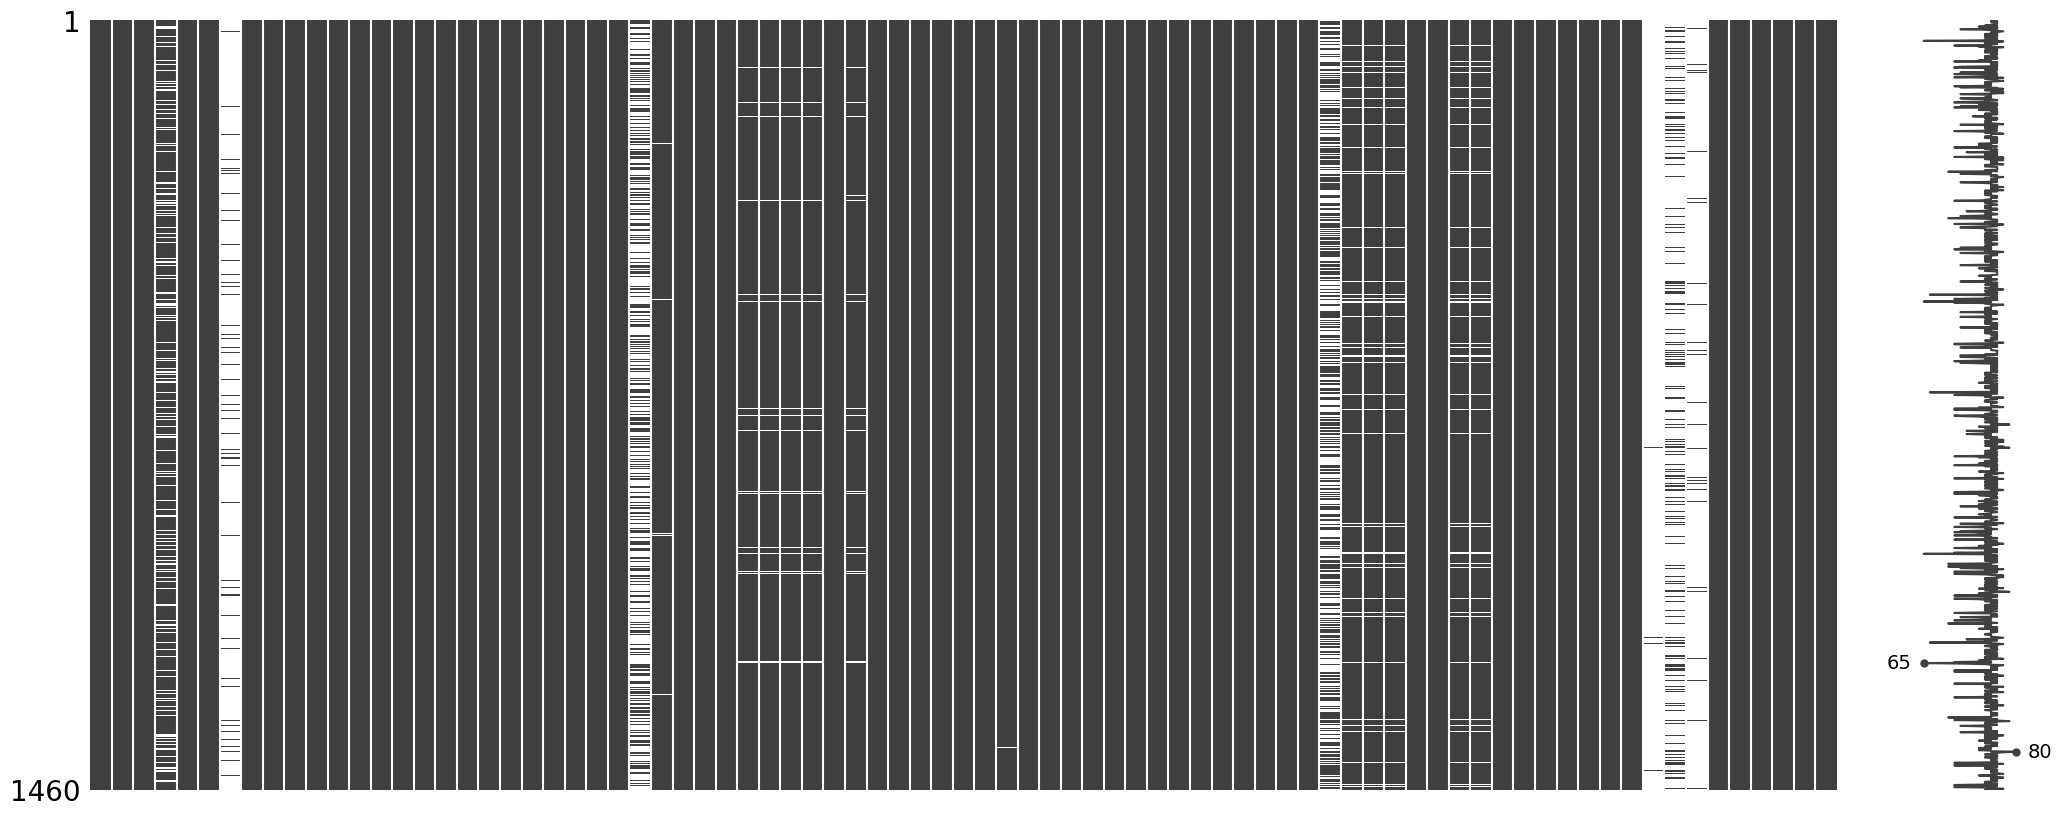

In [9]:
import missingno as msno
msno.matrix(df)

<Axes: >

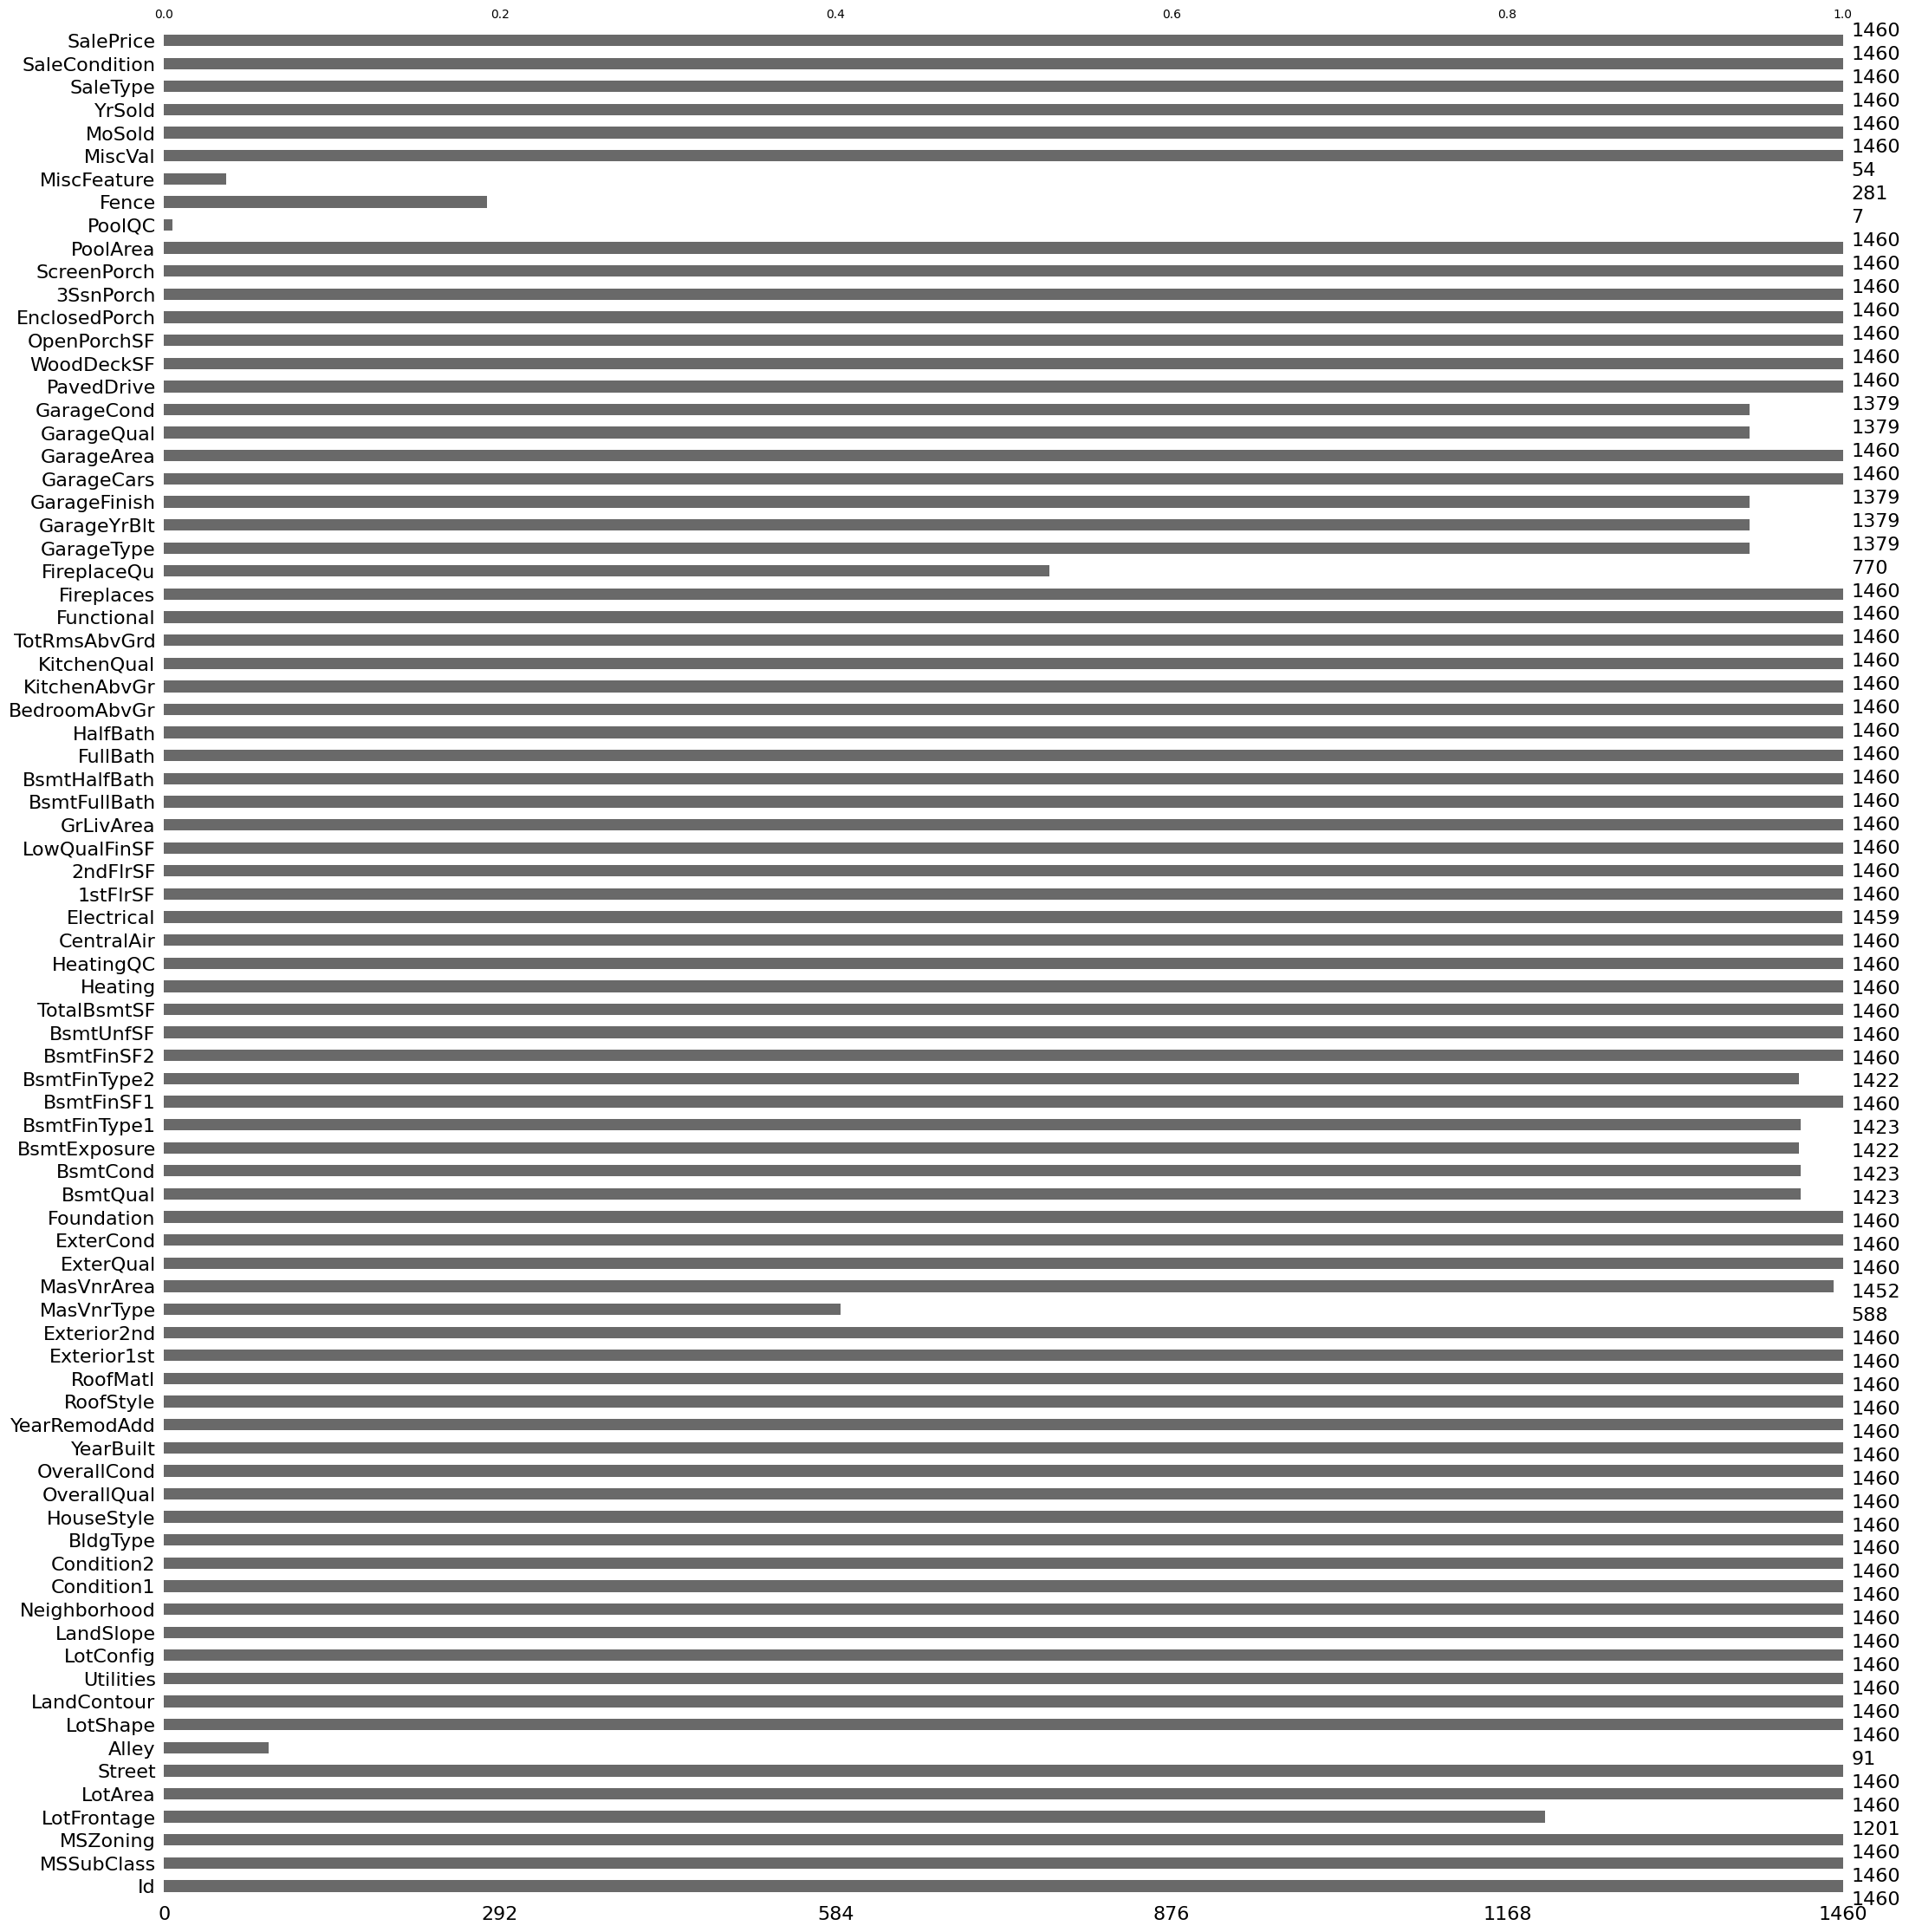

In [10]:
msno.bar(df)

In [11]:
threshold = 0
n_samples  = len(df)
missing_rate = df.isnull().sum() / n_samples * 100
print("List of features with missing rate higher than {}%./n{}".format(threshold, missing_rate[missing_rate>threshold]))

List of features with missing rate higher than 0%./nLotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [12]:
threshold = 0
n_missing = df.isnull().sum()
print('List of features with more missing numbers than {}/n{}'.format(threshold, n_missing[n_missing>threshold]))

List of features with more missing numbers than 0/nLotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [13]:
df_missing = pd.concat([n_missing, missing_rate], axis=1)
df_missing = df_missing.rename(columns={0: 'total', 1: 'missing_ratio'})
df_missing = df_missing.query("total>0 and missing_ratio>0")
display(df_missing)

,total,missing_ratio
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,872,59.726027
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


In [14]:
threshold = 5
many_missing_features = df_missing.query("total >= {}".format(threshold)).index
print("List of features with {} or more missing: /n{}".format(threshold, many_missing_features))

List of features with 5 or more missing: /nIndex(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')


In [15]:
df_dropped_features = df.drop(many_missing_features, axis=1)
display(df_dropped_features.head())

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Number of smaples remaining: 1459


<Axes: >

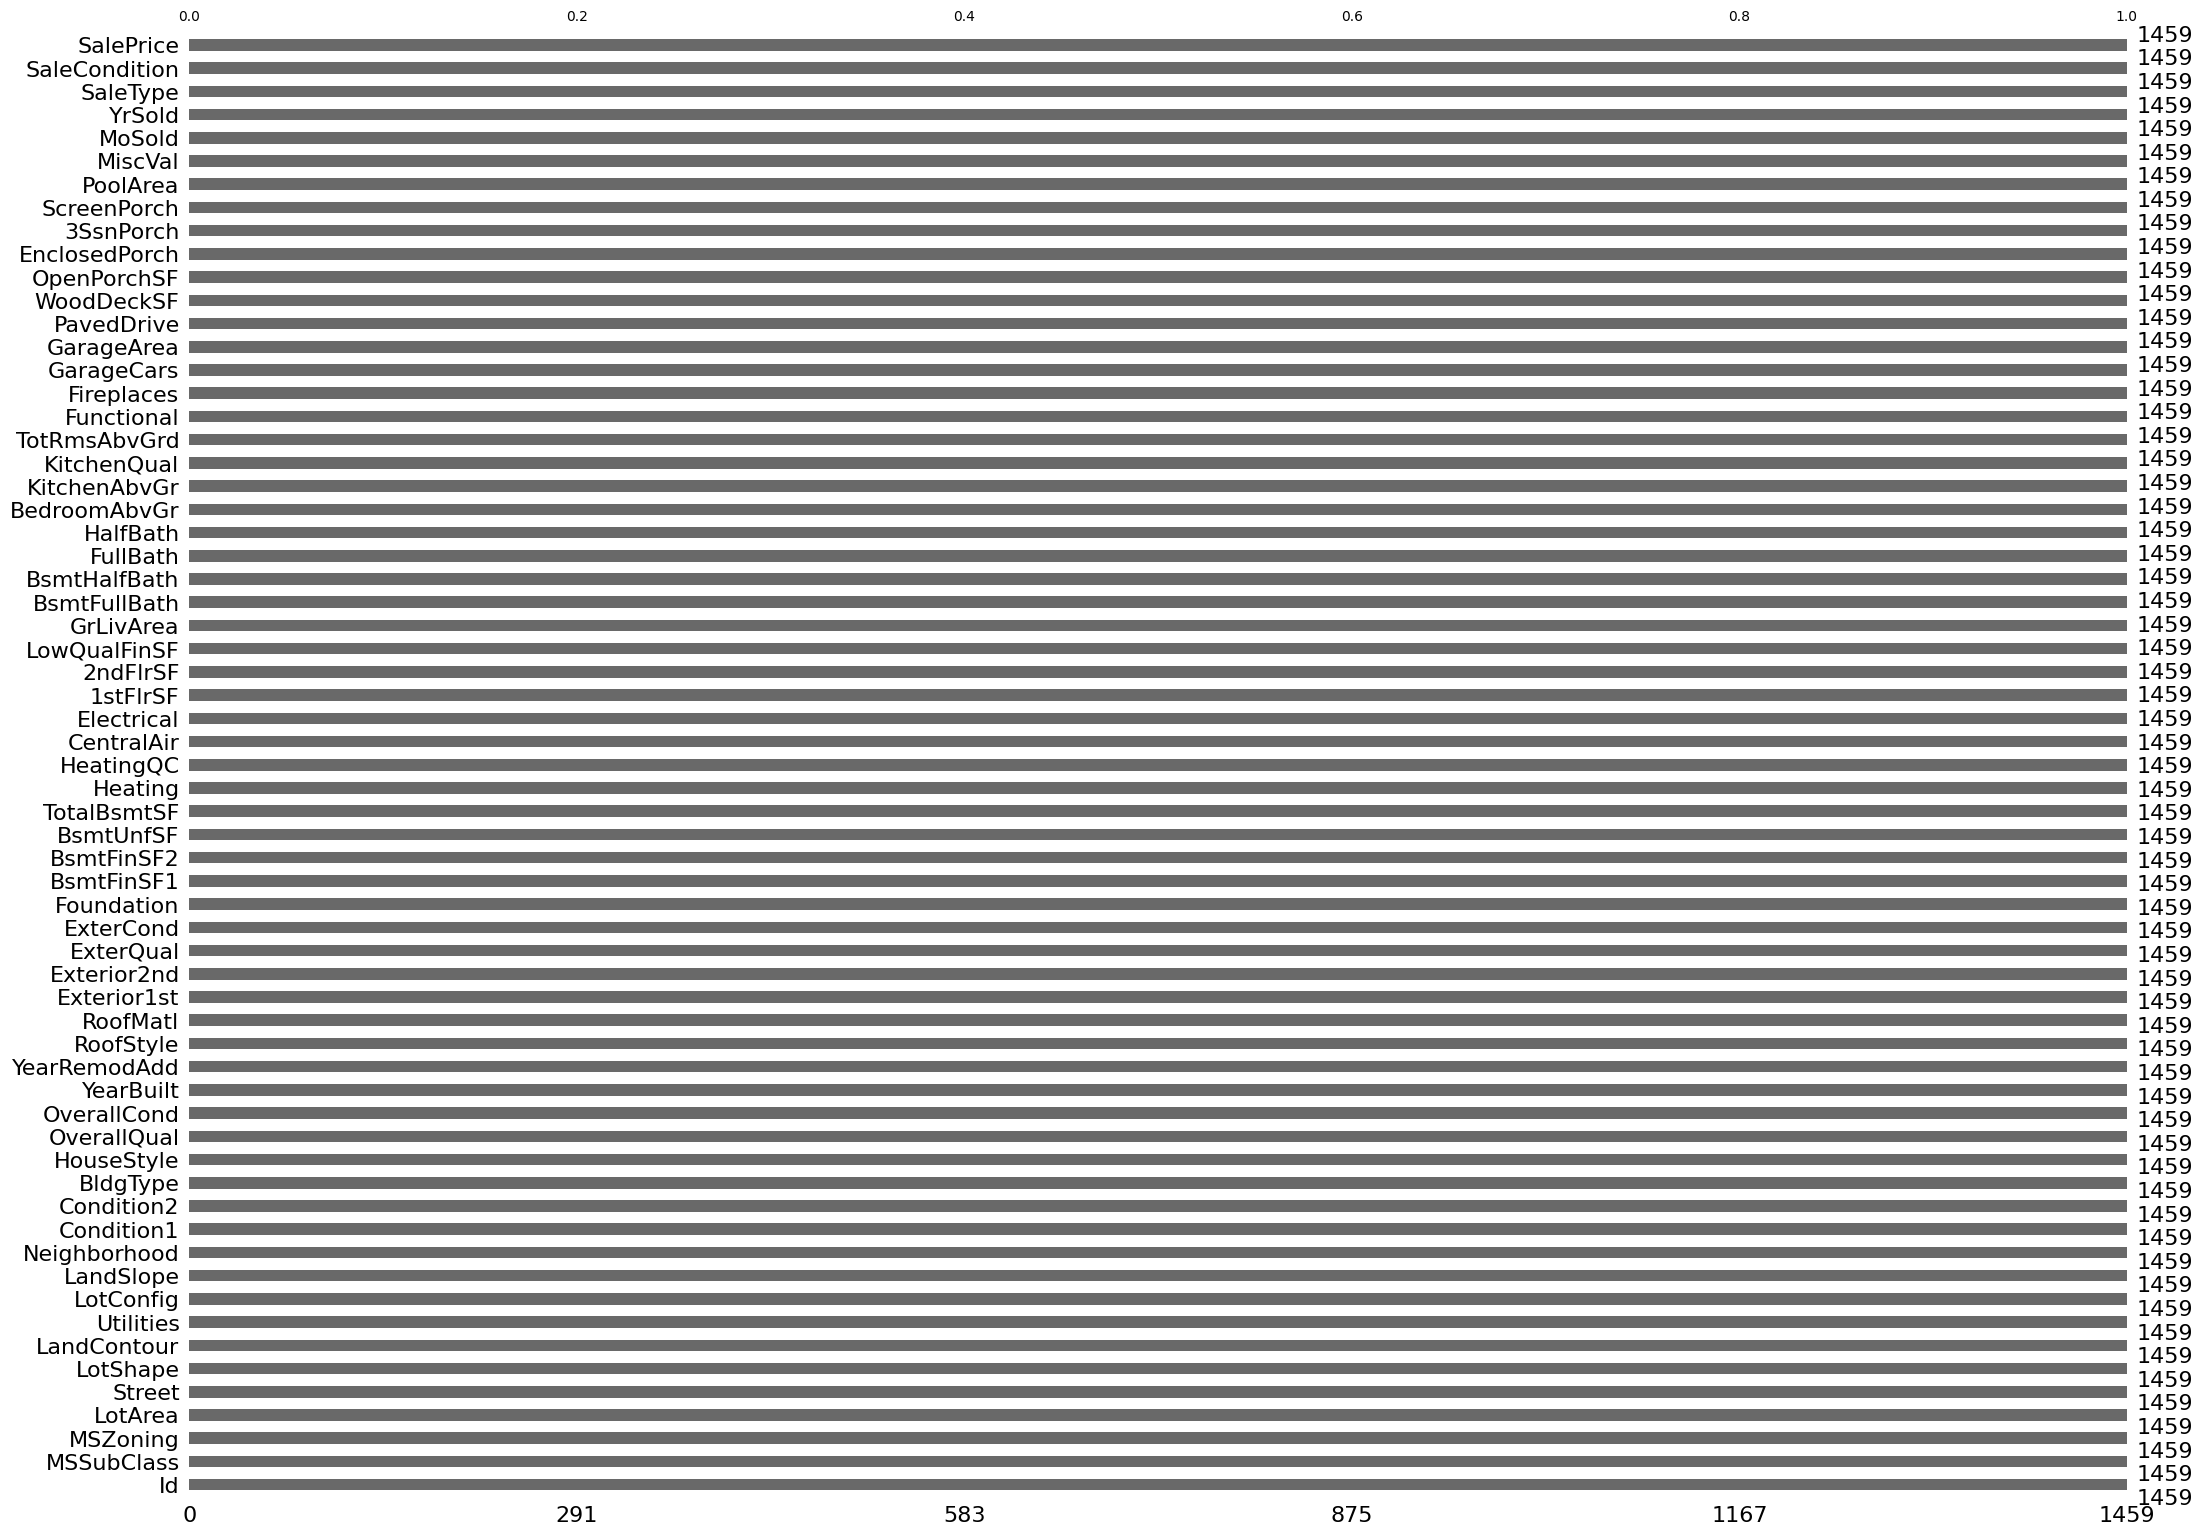

In [16]:
df_dropna = df_dropped_features.dropna(axis=0)
df_dropna = df_dropna.reset_index(drop=True)
print("Number of smaples remaining: {}".format(len(df_dropna)))
msno.bar(df_dropna)

[Problem 5] Researching terminology

Kurtosis: This measures the degree of peakednesss and flatness of a distribution. Kurtosis is a statistical measure that quantifies the shape of a probability distribution. It provides information about the tails and peakedness of the distribution compared to a normal distribution.
Positive kurtosis indicates heavier tails and a more peaked distribution, while negative kurtosis suggests lighter tails and a flatter distribution. Kurtosis helps in analyzing the characteristics and outliers of a dataset.

Skewness: This measures the degree of symmetry of the distribution. It assesses the asymmetry of a probability distribution.  It quantifies the extent to which the data is skewed or shifted to one side. Positive skewness indicates a longer tail on the right side of the distribution, while negative skewness indicates a longer tail on the left side. Skewness helps in understanding the shape and outliers in a dataset.

[Problem 6] Confirming distribution

skewness=1.88 sharpness6.54


<ipython-input-17-20adea3519d4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  display(sns.distplot(target, kde=False, rug=False, bins=10))


<Axes: xlabel='SalePrice'>

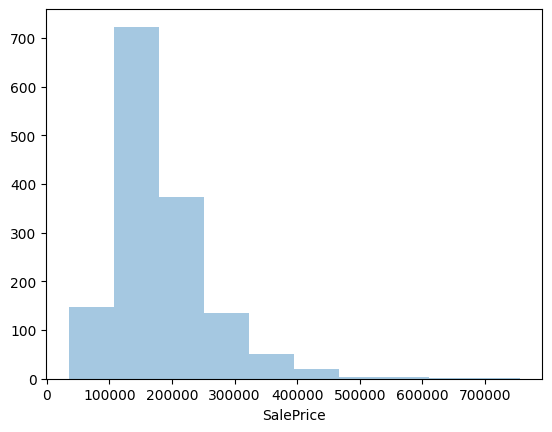

In [17]:
target = df["SalePrice"]
print("skewness={:.2f} sharpness{:.2f}".format(target.skew(), target.kurtosis()))
display(sns.distplot(target, kde=False, rug=False, bins=10))

skewness=0.12 sharpness0.81


<ipython-input-18-fb62f3556aa6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  display(sns.distplot(target_log, kde=False, rug=False, bins=10))


<Axes: xlabel='SalePrice'>

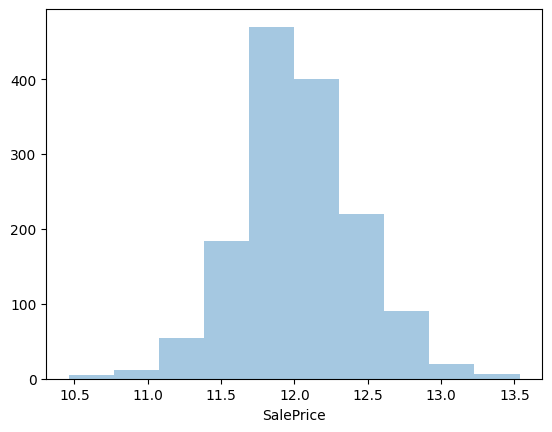

In [18]:
target_log = target.apply(np.log)
print("skewness={:.2f} sharpness{:.2f}".format(target_log.skew(), target_log.kurtosis()))
display(sns.distplot(target_log, kde=False, rug=False, bins=10))

The original data had a kurtosis of 6.53, but the logarithmic transformation resulted in a kurtosis of 0.81. The distribution became closer to a normal distribution.

[Problem 7] Confirming the correlation coefficient -
Checking the correlation coefficient



In [19]:
#Create a heat map of the correlation coefficient matrix
df_corr = df.corr()

colormap = plt.cm.RdBu
plt.subplots(figsize=(15, 12))
plt.title('Correlation matrix')
sns.heatmap(df_corr,linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=False)
plt.show()

ValueError: could not convert string to float: 'RL'